## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [62]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [63]:
import pandas as pd
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [8]:
import pandas as pd
df = pd.read_csv("ab_data.csv")
df
row_num = df.shape[0]
print("Number of rows is: {}".format(row_num))

Number of rows is: 294478


c. The number of unique users in the dataset.

In [9]:
user_total = df.nunique()['user_id']
print("Number of unique users is : {}".format(user_total))

Number of unique users is : 290584


d. The proportion of users converted.

In [10]:
print("Converted users proportion is {}%".format((df['converted'].mean())*100))

Converted users proportion is 11.96591935560551%


e. The number of times the `new_page` and `treatment` don't line up.

In [11]:
sum(df['converted'].values)/row_num

0.11965919355605512

f. Do any of the rows have missing values?

In [12]:
mismatch_grp1 = df.query("group == 'treatment' and landing_page == 'old_page'")
print("Times treatment group user lands incorrectly on old_page is {}".format(len(mismatch_grp1)))

# rows where control group user incorrectly lands on new_page
mismatch_grp2 = df.query("group == 'control' and landing_page == 'new_page'")
print("Times control group user incorrectly lands on new_page is {}".format(len(mismatch_grp2)))

#  number of times the new_page and treatment don't line up is sum of above two values
print("Times new_page and treatment don't line up is {}".format(len(mismatch_grp1) + len(mismatch_grp2)))

Times treatment group user lands incorrectly on old_page is 1965
Times control group user incorrectly lands on new_page is 1928
Times new_page and treatment don't line up is 3893


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [13]:
#Filter on lines where new page and control are aligned
npcontrol = df[(df.landing_page == "new_page") & (df.group == "control")]

#Filter on lines where old page and treatment are aligned
optreatment = df[(df.landing_page == "old_page") & (df.group == "treatment")]

#Concatenate the inaccurate lines 
inaccurate = pd.concat([npcontrol, optreatment])

#Assign the index for these lines
inaccurate_index = inaccurate.index

#Drop the lines with the indexes assigned above
df2 = df.drop(inaccurate_index)

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [15]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
#Remove one of the duplicate lines
df2.drop(labels = 1899, axis=0, inplace=True)

In [20]:
#Confirm removal of one of the lines
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [21]:
#Since 1 is considered True, we don't need to specify the condition "converted == 1". 
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [23]:
#Probability of a user converted in control group
df_grp = df.groupby('group')
df_grp.describe()


converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    147202.0  0.120399  0.325429  0.0  0.0  0.0  0.0  1.0  147202.0   
treatment  147276.0  0.118920  0.323695  0.0  0.0  0.0  0.0  1.0  147276.0   

                                                                      \
                    mean           std       min       25%       50%   
group                                                                  
control    788123.098035  91278.896888  630002.0  709287.0  788053.5   
treatment  787825.226283  91142.800641  630000.0  708729.5  787837.5   

                                
                 75%       max  
group                           
control    867155.50  945998.0  
treatment  866693.75  945999.0

c. Given that an individual was in the `treatment` group, what is the probability they converted?

Given that an individual was in the treatment group, the probability they converted is 0.11880

d. What is the probability that an individual received the new page?

In [24]:
# number of individuals who got new page is same as those in treatment group
new_user = len(df.query("group == 'treatment'"))

# calculate total number of users
users=df.shape[0]

# thus, probability that an individual received the new page is new_user/users
new_user_p = new_user/users
print(new_user_p)

0.5001256460584492


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

## Evidence that one page leads to more conversions?

-Given that an individual was in the treatment group, the probability they converted is 0.118807
-Given that an individual was in the control group, the probability they converted is 0.120386
-We find that old page does better, but by a very tiny margin.
-Change aversion, test span durations and other potentially influencing factors are not accounted for. So, we cannot state with certainty that one page leads to more conversions. This is even more important due to almost similar perforamnce of both pages

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

## Hypothesis

$H_{0}$ : $p_{old}$ >=  $p_{new}$
$H_{1}$ : $p_{old}$ <  $p_{new}$



## In other words,
$H_{0}$ : $p_{new}$ <= $p_{old}$
$H_{1}$ : $p_{new}$ > $p_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [30]:
#Find the proportion of converted rate assuming p_new and p_old are equal
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old = df2['converted'].mean()
print(p_old)

0.119597087245


c. What is $n_{new}$?

In [31]:
#Number of users landing on new page
n_new = df2.query('group == "treatment"')['user_id'].count()
n_new = int(n_new)
n_new

145310

d. What is $n_{old}$?

In [28]:
n_old = len(df2.query("group == 'control'"))
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])
# print(len(new_page_converted)) #code to check values

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
#Draw samples from a binomial distribution
old_page_converted = np.random.binomial(1, p_old,n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
#Number of rows from new page are higher than the ones on old page, therefore we truncate new page up to the numbers of old 
#page and compute the difference
new_page_converted = new_page_converted[:145274]
new_page_converted.mean() - old_page_converted.mean()

0.00059886834533365296

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.


Here, value of size is different for n_new and n_old. So, computing difference will throw an error. Hence, we use mean function for both old and new page conversion simulations to overcome this problem of shape difference. We are still using probabilities as previous case.

In [35]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

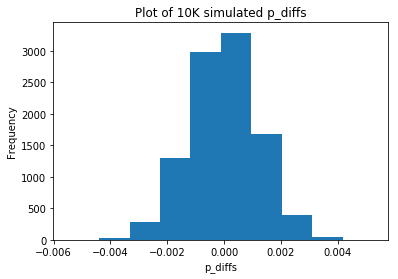

In [38]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of 10K simulated p_diffs');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [39]:
# compute difference from original dataset ab_data.csv
act_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean()
act_diff 

-0.0014795997940775518

In [41]:
p_diffs = np.array(p_diffs)
p_diffs

array([ 0.00039705, -0.00091101,  0.00025235, ..., -0.00117904,
       -0.00036679,  0.00010094])

In [42]:
(act_diff < p_diffs).mean()

0.8891

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### Actual difference represents the difference between converted rates of new page and old page, based on our data.


#### p-diffs represents the simuated difference between converted rates of new page and old page, based on 10000 simulated samples.

#### The percentage of 90.5 is called scientifically p-value, which determines the probability of obtaining our observed statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [43]:
import statsmodels.api as sm

convert_old = sum(df2.query('group == "control"')['converted'])
convert_new = sum(df2.query('group == "treatment"')['converted'])
n_old = df2.query("group == 'control'")['user_id'].count()
n_new = df2.query("group == 'treatment'")['user_id'].count()

#Convert figures to integers
n_old = int(n_old)
n_new = int(n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [45]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [46]:
from scipy.stats import norm

print(norm.cdf(z_score))
# Tells us how significant our z-score is

# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)))
# Tells us what our critical value at 95% confidence is 
# Here, we take the 95% values as specified in PartII.1

0.905058312759
1.64485362695


##### Answer:

-We find that the z-score of 1.31092419842 is less than the critical value of 1.64485362695. So, we accept the null hypothesis.

-As regards the conversion rates of the old and new pages, we find that old pages are only minutely better than new pages.

-These values agree with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

#### Logistic Regression

b. The goal is to use statsmodels to fit the regression model you specified in part a. to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received. Add an intercept column, as well as an ab_page column, which is 1 when an individual receives the treatment and 0 if control.

In [51]:
df['intercept']=1
df[['control', 'treatment']] = pd.get_dummies(df['group'])

c. Use statsmodels to import your regression model. Instantiate the model, and fit the model using the two columns you created in part b. to predict whether or not an individual converts.

In [52]:
import statsmodels.api as sm
logit = sm.Logit(df['converted'],df[['intercept','treatment']])


d. Provide the summary of your model below, and use it as necessary to answer the following questions

In [50]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Aug 2018   Pseudo R-squ.:               7.093e-06
Time:                        23:23:15   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.008   -248.297      0.000      -2.004      -1.973
treatment     -0.0140      0.011     -1.237      0.216      -0.036       0.008
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

#### Answer:

Our hypothesis here is:


-H0  :  pnew  -  pold  = 0


-H1  :  pnew  -  pold  != 0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

##### We could consider introducing the timestamp metric to determine in which part of the day the individuals converted the most. For example, if we find that the evening is the period that users spend most of their time on the internet we might also take it into consideration.

**Put your answer here.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [53]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [54]:
### Create the necessary dummy variables
df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]
df_new.head()


,country,timestamp,group,landing_page,converted,CA,US
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [56]:
### Fit Your Linear Model And Obtain the Results
df['intercept'] = 1


log_mod = sm.Logit(df_new['converted'], df_new[['CA', 'US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.447174
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Aug 2018   Pseudo R-squ.:                 -0.2214
Time:                        23:31:24   Log-Likelihood:            -1.2994e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CA            -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US            -1.9967      0.007   -292.314      0.000      -2.010      -1.983
==============================================================================
"""

In [57]:
np.exp(results.params)


CA    0.130350
US    0.135779
dtype: float64

In [58]:
1/_


0.00010001000100010001

<a id='conclusions'></a>
## Conclusions from Regression

-As in this logistic regression model too, we find that the values do not show a substantial difference in teh conversion rates for control group and treatment group.


-This indicates that we can acceot the Null Hypothesis and keep the existing page as is.

## Conclusions

According to the analysis performed I found that the old page was better than the new page, therefore I fail to reject the null hypothesis. Moreover, the histogram shows that the new page is not better than the old page.

From the regression above we see that the p-value is higher in US than in Canada, which means that users in the US are more likely to convert, but still not enough evidence to reject the null hypothesis.


In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0